In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
def plot_linear_regression(array, theta, title):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    
    test_x = array[:,0]
    test_y = array[:,1]
    ax.set_title(title)
    ax.plot(test_x, test_y, 'bo')

    x = np.array([min(test_x), max(test_x)])
    y = theta[0] + theta[1]*x

    ax.plot(x, y, 'r')

In [45]:
def least_squares_linear_regression(theta, array):
    sum_least_squares = 0
    for pair in array:
        x = pair[0]
        y = pair[1]
        sum_least_squares += ((theta[0] + theta[1]*x) - y)**2
        
    return sum_least_squares

1.	Theta_0: 35.96173558431729;
	Theta_1: 10.82183678219426;
	Least-squares linear regression: 20987.91498070279

2.	Theta_0: 3.347228604354278;
	Theta_1: 0.6298175767238092;
	Least-squares linear regression: 17377.645874284513

3.	Theta_0: 33.122886531068076;
	Theta_1: 9.574600774751726;
	Least-squares linear regression: 14388.671589899144

4.	Theta_0: 6.126754877970193;
	Theta_1: 1.1235347533882543;
	Least-squares linear regression: 11914.0595643251

5.	Theta_0: 30.780785772873283;
	Theta_1: 8.51573747353326;
	Least-squares linear regression: 9865.282932996794

6.	Theta_0: 8.435490223640564;
	Theta_1: 1.5072299316017999;
	Least-squares linear regression: 8169.052338883153

7.	Theta_0: 28.849150793163197;
	Theta_1: 7.615340666409704;
	Least-squares linear regression: 6764.693096926346

8.	Theta_0: 10.353741561127709;
	Theta_1: 1.8022386958736778;
	Least-squares linear regression: 5601.973838317883

9.	Theta_0: 27.256625649082828;
	Theta_1: 6.848410925064886;
	Least-squares linear regre

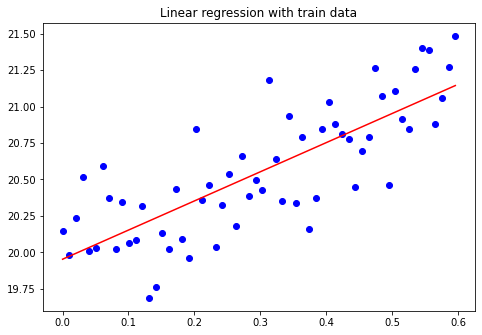

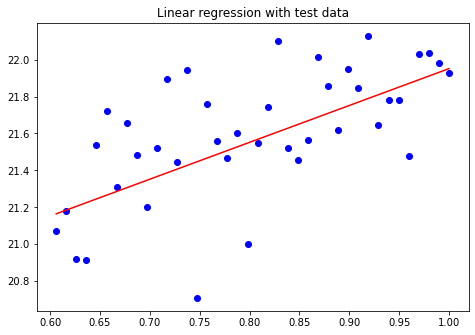

In [48]:
train_array = np.genfromtxt('lab_1_train.csv', delimiter=',')[1:,1:]
# theta = np.array([19.5, 2.6])
theta = np.array([0.0, 0.0])

alpha = 1.75
m = train_array[:,0].size

sum_least_squares_prev = 0.0
sum_least_squares_next = 1.0
difference = 1.0
precision = 0.0001
i = 0

while abs(difference) > precision:
    sum_theta_0 = 0
    sum_theta_1 = 0
#     calculate derivative of cost function
    for pair in train_array:
        x = pair[0]
        y = pair[1]
        sum_theta_0 += ((theta[0] + theta[1]*x) - y)
        sum_theta_1 += ((theta[0] + theta[1]*x) - y)*x

#     calculate gradient descent
    theta[0] -= alpha*(1/m * sum_theta_0)
    theta[1] -= alpha*(1/m * sum_theta_1)

#     calculate least-squares linear regression
    sum_least_squares_next = least_squares_linear_regression(theta, train_array)
        
    difference = sum_least_squares_next - sum_least_squares_prev
    sum_least_squares_prev = sum_least_squares_next
        
    i = i + 1
    
    print(f"{i}.\tTheta_0: {theta[0]};\n\tTheta_1: {theta[1]};\n\tLeast-squares linear regression: {sum_least_squares_next}\n")



print(f"The cycle finished on the {i} iteration with precition: {precision} and alpha: {alpha}")
print(f"Least-squares linear regression for train data: {sum_least_squares_next}")
print(f"Equation of linear regression: Y = {theta[0]} + {theta[1]}X")

plot_linear_regression(train_array, theta, "Linear regression with train data")

test_array = np.genfromtxt('lab_1_test.csv', delimiter=',')[1:,1:]
test_least_squares_linear_regression = least_squares_linear_regression(theta, test_array)
print(f"\nLeast-squares linear regression for test data: {test_least_squares_linear_regression}")
plot_linear_regression(test_array, theta, "Linear regression with test data")
